# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, yahoofinance, fbprophet and plotly

import pandas as pd
from fbprophet import Prophet
import plotly.express as px
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 19.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
tsla = yf.Ticker('TSLA')
df= tsla.history(period = '1y')
df.reset_index(inplace = True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-18,613.369995,628.349976,611.799988,623.309998,24560900,0,0
2021-06-21,624.479980,631.390015,608.880005,620.830017,24812700,0,0
2021-06-22,618.250000,628.570007,615.500000,623.710022,19158900,0,0
2021-06-23,632.000000,657.200012,630.039978,656.570007,31099200,0,0
2021-06-24,674.989990,697.619995,667.609985,679.820007,45982400,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-06-18 to 2022-06-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    int64  
 5   Dividends     253 non-null    int64  
 6   Stock Splits  253 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 15.8 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.0,253.0
mean,864.967510,885.070432,843.021068,863.874740,2.525375e+07,0.0,0.0
std,162.787041,167.583979,155.520976,161.562186,9.012977e+06,0.0,0.0
min,613.369995,628.349976,608.880005,620.830017,9.800600e+06,0.0,0.0
25%,716.000000,734.000000,704.210022,716.659973,1.882670e+07,0.0,0.0
50%,849.099976,866.140015,822.349976,843.030029,2.383930e+07,0.0,0.0
75%,1006.799988,1034.849976,982.530029,1009.010010,3.011220e+07,0.0,0.0
max,1234.410034,1243.489990,1217.000000,1229.910034,6.285210e+07,0.0,0.0


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x = 'Date', y = "Close")

In [ ]:
px.line(df, x = 'Date', y = "Close")

In [ ]:
px.area(df, x = 'Date', y = "Volume")

In [ ]:
px.bar(df, y = 'Volume')

In [ ]:
px.box(df, y ='Close')

# Understanding Facebook Prophet

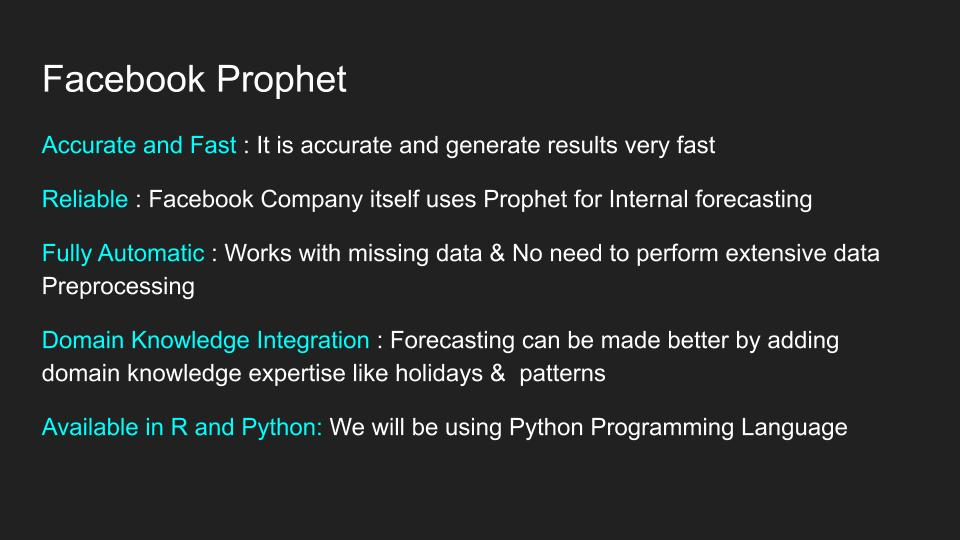

## Data Preperation
Prophet takes only Date labelled as ds and Price labelled as y

In [ ]:
ndf = df[['Date', 'Close']]

In [ ]:
ndf  

,Date,Close
0,2021-06-18,623.309998
1,2021-06-21,620.830017
2,2021-06-22,623.710022
3,2021-06-23,656.570007
4,2021-06-24,679.820007
...,...,...
248,2022-06-13,647.210022
249,2022-06-14,662.669983
250,2022-06-15,699.000000
251,2022-06-16,639.299988


In [ ]:
prophet_df = ndf.rename(columns = {'Date': 'ds', "Close": 'y'})

In [ ]:
prophet_df.head()

,ds,y
0,2021-06-18,623.309998
1,2021-06-21,620.830017
2,2021-06-22,623.710022
3,2021-06-23,656.570007
4,2021-06-24,679.820007


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-18,581.771597,447.388558,685.465714,581.771597,581.771597,-15.955105,-15.955105,-15.955105,-15.955105,-15.955105,-15.955105,0.0,0.0,0.0,565.816491
1,2021-06-21,589.971085,466.608840,694.080228,589.971085,589.971085,-1.531887,-1.531887,-1.531887,-1.531887,-1.531887,-1.531887,0.0,0.0,0.0,588.439198
2,2021-06-22,592.704248,467.752597,694.807974,592.704248,592.704248,-6.625857,-6.625857,-6.625857,-6.625857,-6.625857,-6.625857,0.0,0.0,0.0,586.078391
3,2021-06-23,595.437410,473.309798,704.186075,595.437410,595.437410,-3.734762,-3.734762,-3.734762,-3.734762,-3.734762,-3.734762,0.0,0.0,0.0,591.702648
4,2021-06-24,598.170573,460.826146,707.421615,598.170573,598.170573,-11.548281,-11.548281,-11.548281,-11.548281,-11.548281,-11.548281,0.0,0.0,0.0,586.622292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-07-13,656.898516,531.447244,771.079170,649.765856,663.611281,-3.734762,-3.734762,-3.734762,-3.734762,-3.734762,-3.734762,0.0,0.0,0.0,653.163754
279,2022-07-14,654.269315,521.413141,752.971542,646.803926,661.414990,-11.548281,-11.548281,-11.548281,-11.548281,-11.548281,-11.548281,0.0,0.0,0.0,642.721034
280,2022-07-15,651.640114,518.173287,755.019794,643.696914,659.203687,-15.955105,-15.955105,-15.955105,-15.955105,-15.955105,-15.955105,0.0,0.0,0.0,635.685009
281,2022-07-16,649.010913,553.495674,782.037636,640.643949,657.058209,19.697946,19.697946,19.697946,19.697946,19.697946,19.697946,0.0,0.0,0.0,668.708859


In [ ]:
px.line(forecast, x = 'ds', y = 'yhat')

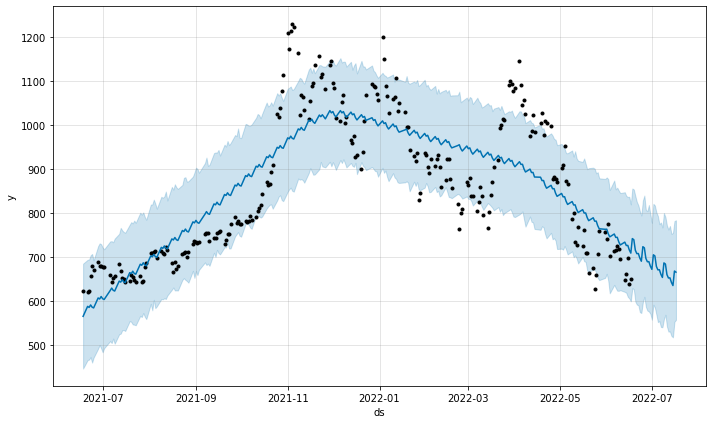

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel = 'y')

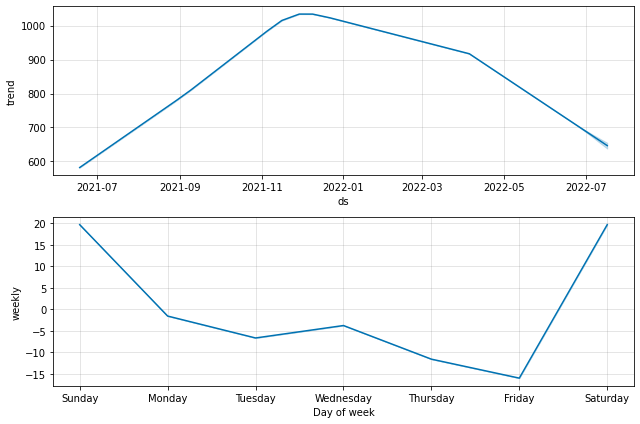

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Automate Process

In [ ]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px
!pip install yfinance
import yfinance as yf

In [ ]:
def prophet_pred(stock_ticker: str, period: str, forecast_length: int ):
  """ Function returns future forecast df and plot of predictions using Prophet model
  Inputs:
    stock_ticker: string of yahoo finance stocker ticker (ie. 'TSLA' for Tesla)
    period: string for how much history to load from yahoo finance (inputs can be '1y', '2y', '5y' etc. search yfinance for more details)
    forecast_length: int for how far into future to predict (based on input frequency of data)
  
  Outputs:
    returns future forecast + current preds dataframe
    returns Plot of preds and actuals
  """
  stock = yf.Ticker(stock_ticker)
  df= stock.history(period = period)
  df.reset_index(inplace = True)

  ndf = df[['Date', 'Close']]
  prophet_df = ndf.rename(columns = {'Date': 'ds', "Close": 'y'})

  m = Prophet()
  m.fit(prophet_df)

  future = m.make_future_dataframe(periods = forecast_length)
  forecast = m.predict(future)

  figure = m.plot(forecast, xlabel='ds', ylabel = 'y')

  return forecast